In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sn
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
%cd "E:\MLAI classes\projects\project 1"

E:\MLAI classes\projects\project 1


In [3]:
data=pd.read_csv("Database.csv")

C:\Users\tholk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,19,21,49,85,86,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(data)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(113), object(17)
memory usage: 5.0+ MB


In [7]:
#seperate caterogical and numeric
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64','int64','float32','int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)


['region', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'cardspent', 'card2spent', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'tollfree', 'tollmon', 'tollten', '

In [8]:
print(cat_var_names)

['custid', 'townsize', 'birthmonth', 'lncreddebt', 'lnothdebt', 'commutetime', 'longten', 'lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'cardten', 'lncardten', 'lnwiremon', 'lnwireten']


In [9]:
len(data)

5000

In [10]:
data= data[numeric_var_names]
data.head(2)

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [11]:
data.isnull().sum().value_counts()

0    113
dtype: int64

In [12]:
#remove missing values
counts=len(data)*0.25
data_new=data.dropna(thresh=counts, axis=1)

In [13]:
data_new

,region,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,0.0,68.0,6.0,10.0,1.0,1.0,0.0,24.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,3.0,0.0,51.0,5.0,14.0,2.0,1.0,0.0,6.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,4.0,0.0,75.0,6.0,17.0,4.0,1.0,0.0,24.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,1.0,0.0,47.0,4.0,19.0,4.0,2.0,0.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [14]:
#drop variables of high corr
corr=data_new.corr()

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data_new.columns[columns]
data_new = data_new[selected_columns]

In [16]:
data_new

,region,gender,age,ed,jobcat,union,employ,empcat,retire,income,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,1.0,20.0,15.0,1.0,1.0,0.0,1.0,0.0,31.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,0.0,22.0,17.0,2.0,0.0,0.0,1.0,0.0,15.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,1.0,67.0,14.0,2.0,0.0,16.0,5.0,0.0,35.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,0.0,23.0,16.0,2.0,0.0,0.0,1.0,0.0,20.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,0.0,26.0,16.0,2.0,0.0,1.0,1.0,0.0,23.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,0.0,68.0,10.0,1.0,0.0,24.0,5.0,0.0,196.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,3.0,0.0,51.0,14.0,1.0,0.0,6.0,3.0,0.0,83.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,4.0,0.0,75.0,17.0,1.0,0.0,24.0,5.0,0.0,108.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,1.0,0.0,47.0,19.0,2.0,0.0,3.0,2.0,0.0,189.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [17]:
list(data_new.columns) 

['region',
 'gender',
 'age',
 'ed',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'debtinc',
 'creddebt',
 'othdebt',
 'default',
 'jobsat',
 'marital',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'cardspent',
 'card2spent',
 'active',
 'bfast',
 'churn',
 'longmon',
 'lnlongmon',
 'tollfree',
 'tollmon',
 'tollten',
 'equip',
 'equipten',
 'callcard',
 'cardmon',
 'wirel

In [18]:
data_new.shape

(5000, 102)

In [19]:
def outlier_miss_treat(x):
    x=x.clip_upper(x.quantile(0.99))
    x=x.clip_lower(x.quantile(0.01))
    x=x.fillna(x.median())
    return x

In [20]:
data_new=data_new.apply(outlier_miss_treat)
data_new.describe()

,region,gender,age,ed,jobcat,union,employ,empcat,retire,income,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.0000,5000.00000,5000.000000,5000.0000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.00140,0.503600,47.025600,14.544200,2.7528,0.15120,9.698000,2.9326,0.147600,53.629900,...,0.932800,0.201000,0.63280,0.479200,0.474800,0.178800,0.472600,0.083600,0.129800,0.102600
std,1.42176,0.500037,17.770338,3.242553,1.7379,0.35828,9.581689,1.4533,0.354739,46.567698,...,0.250393,0.400788,0.48209,0.499617,0.499415,0.383223,0.499299,0.276815,0.336117,0.303466
min,1.00000,0.000000,18.000000,8.000000,1.0000,0.00000,0.000000,1.0000,0.000000,9.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.00000,0.000000,31.000000,12.000000,1.0000,0.00000,2.000000,2.0000,0.000000,24.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,1.000000,47.000000,14.000000,2.0000,0.00000,7.000000,3.0000,0.000000,38.000000,...,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.00000,1.000000,62.000000,17.000000,4.0000,0.00000,15.000000,4.0000,0.000000,67.000000,...,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,5.00000,1.000000,79.000000,21.000000,6.0000,1.00000,39.000000,5.0000,1.000000,272.010000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#merge two columns to make Y
data_new['ttlspend'] = data_new['cardspent'] + data_new['card2spent']

In [22]:
data_new.drop(["cardspent","card2spent"],axis=1, inplace=True)

In [23]:
data_new.shape

(5000, 101)

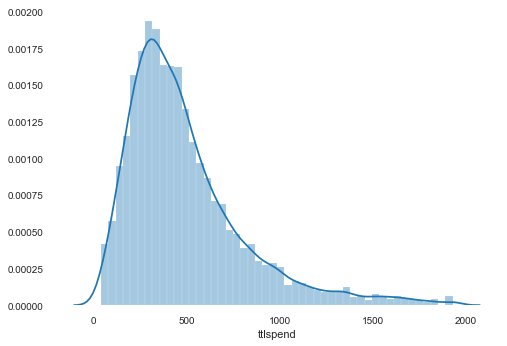

In [24]:
sns.distplot(data_new.ttlspend)
plt.show()

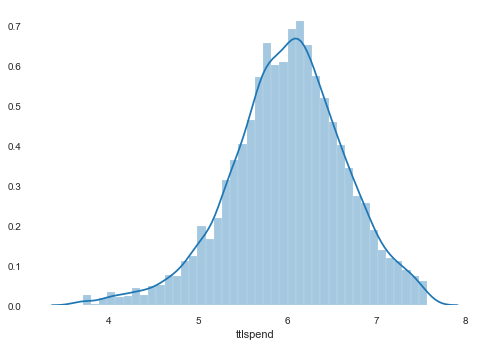

In [25]:
#Y is normally distributed
sns.distplot(np.log(data_new["ttlspend"]))
plt.show()

In [26]:
Y=np.log(data_new["ttlspend"])
Y

0       5.007029
1       4.350794
2       5.886021
3       5.884464
4       6.230147
          ...   
4995    7.262397
4996    5.903589
4997    7.331551
4998    6.623999
4999    6.010924
Name: ttlspend, Length: 5000, dtype: float64

In [27]:
data_new.shape

(5000, 101)

In [28]:
data_new.corr()

,region,gender,age,ed,jobcat,union,employ,empcat,retire,income,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,ttlspend
region,1.000000,-0.012810,-0.026525,0.013850,-0.004717,-0.013768,-0.010204,-0.009345,-0.042849,0.036594,...,0.040228,0.020596,0.007504,0.026391,0.036622,0.012312,-0.013004,0.005899,0.005694,0.043054
gender,-0.012810,1.000000,-0.010186,-0.000777,-0.016470,0.000311,-0.011756,-0.013842,-0.021040,-0.001949,...,-0.001116,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685,-0.077578
age,-0.026525,-0.010186,1.000000,-0.093966,0.037709,0.011206,0.705515,0.739573,0.567519,0.208286,...,-0.074423,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.031339
ed,0.013850,-0.000777,-0.093966,1.000000,-0.072855,0.000273,-0.214669,-0.197841,-0.092627,0.186802,...,0.300016,0.435623,0.369831,0.377019,0.276163,-0.073510,-0.117333,0.073750,0.107912,0.100796
jobcat,-0.004717,-0.016470,0.037709,-0.072855,1.000000,0.084778,0.416234,0.346723,0.173736,0.106852,...,-0.009352,-0.037929,-0.026888,-0.050278,0.008409,0.090861,0.000137,0.002888,-0.008415,0.002497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
news,0.012312,-0.020837,0.365204,-0.073510,0.090861,0.007508,0.368778,0.369206,0.213707,0.138730,...,-0.037949,-0.061753,-0.099716,-0.089811,-0.024573,1.000000,0.020919,0.030136,-0.011148,0.040633
response_01,-0.013004,0.018058,0.015140,-0.117333,0.000137,-0.010492,0.039085,0.030418,-0.003457,-0.002440,...,-0.023472,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.007496
response_02,0.005899,0.001385,0.013175,0.073750,0.002888,0.006431,0.014410,0.017504,-0.019784,0.062895,...,0.021608,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.022498
response_03,0.005694,-0.009685,-0.026231,0.107912,-0.008415,0.004479,-0.029312,-0.032850,-0.038500,0.053011,...,0.077116,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.051618


In [29]:
#data_new.drop(['ttlspend'],axis=1,inplace=True)

In [30]:
##Feature Selcetion
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway
F_values, P_values = f_regression(data_new,Y)

In [31]:
F_values

array([7.77914910e+00, 3.12065176e+01, 1.67911008e-01, 4.86320636e+01,
       6.89756894e-01, 2.35659176e+00, 2.30980932e+01, 4.61578015e+01,
       2.07424619e+02, 7.23919844e+02, 9.82060617e+02, 1.23148962e+00,
       2.86700328e+02, 3.64131040e+02, 1.69304597e+00, 2.16202526e+01,
       1.59268817e+00, 6.75301022e-02, 1.34812508e-01, 1.51730542e-02,
       2.50887287e-01, 1.70183913e+00, 2.19673251e+00, 4.62940960e-02,
       7.05236502e-02, 2.24899789e-01, 2.39358860e+01, 1.33506342e+00,
       1.05707206e+01, 9.87819701e-01, 2.79347488e+01, 3.73705081e-02,
       5.18475671e+02, 2.21686167e+02, 2.10947291e-01, 1.32853297e+00,
       4.40248678e-01, 1.19163721e+00, 1.18773826e+00, 3.24292358e-01,
       7.92561558e-01, 6.00191174e-01, 9.92251583e-02, 3.13719052e+00,
       3.11777586e-02, 5.74233180e-01, 3.89474932e-02, 1.36959406e+00,
       1.18402980e+00, 1.35673434e-01, 5.57474621e+00, 1.58636123e+01,
       2.94987717e+02, 2.80570260e-05, 1.89681702e+00, 2.94086694e-01,
      

In [32]:
F_reg_results = pd.concat([pd.Series(data_new.columns),pd.Series(F_values),pd.Series(P_values)], axis=1)
F_reg_results.columns = ['Feature','F_values','P_values']
F_reg=F_reg_results.sort_values('F_values',ascending=False)
Features = F_reg[["Feature"]].reset_index().drop('index', axis=1)
Features

,Feature
0,ttlspend
1,lninc
2,income
3,carvalue
4,othdebt
...,...
96,cartype
97,commutewalk
98,card2benefit
99,pets_cats


In [33]:
Features.iloc[:,0]

0          ttlspend
1             lninc
2            income
3          carvalue
4           othdebt
           ...     
96          cartype
97      commutewalk
98     card2benefit
99        pets_cats
100        cardtype
Name: Feature, Length: 101, dtype: object

In [34]:
X_data= data_new[Features.iloc[:,0]]
X_data.shape

(5000, 101)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [36]:
X_data=X_data[X_data.columns.difference([])]

In [37]:
variance_inflation_factor(X_data.values,0)

2.0739283900632293

In [38]:
VIF = [variance_inflation_factor(X_data.values,i) for i in range(X_data.shape[1])]

In [39]:
VIF_results = pd.concat([pd.Series(X_data.columns),pd.Series(VIF)],axis=1)
VIF_results.columns = ['Feature','VIF']
VIF_results.sort_values('VIF', ascending=False,inplace=True)
VIF_results

,Feature,VIF
55,lninc,212.432243
72,pets,199.367886
76,pets_freshfish,122.649775
69,owntv,89.711146
56,lnlongmon,82.650900
...,...,...
88,response_03,1.161885
86,response_01,1.141316
31,commutemotorcycle,1.132766
33,commutepublic,1.131822


In [40]:
X_data.columns

Index(['active', 'address', 'age', 'bfast', 'callcard', 'callid', 'callwait',
       'carbought', 'carbuy', 'carcatvalue',
       ...
       'tollfree', 'tollmon', 'tollten', 'ttlspend', 'union', 'voice', 'vote',
       'wireless', 'wiremon', 'wireten'],
      dtype='object', length=101)

In [41]:
X_data.shape

(5000, 101)

In [42]:
##Train_Test Split
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X_data,Y,test_size=0.3,random_state=123)

In [43]:
print(len( train_X))
print (len( test_X))
print(len( train_y))
print (len( test_y))

3500
1500
3500
1500


In [44]:
import statsmodels.api as smf

In [45]:
train_X = smf.add_constant(train_X)
test_X=smf.add_constant(test_X)
lm=smf.OLS(train_y,train_X).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               ttlspend   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     172.9
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:46:42   Log-Likelihood:                -315.89
No. Observations:                3500   AIC:                             835.8
Df Residuals:                    3398   BIC:                             1464.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7194      0.08

In [47]:
lm.pvalues.sort_values(ascending=False)

commutewalk        9.931202e-01
commuterail        9.922882e-01
commutenonmotor    9.884145e-01
tollmon            9.862040e-01
empcat             9.855826e-01
                       ...     
carcatvalue        6.132215e-03
income             3.645573e-07
lninc              8.267273e-17
ttlspend           0.000000e+00
const              0.000000e+00
Length: 102, dtype: float64

In [48]:
test_pred=lm.predict(test_X)
train_pred=lm.predict(train_X)

from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 0.06400375519229033
MSE Train: 0.0701327333470999


In [49]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.18315592870524833
MSE: 0.06400375519229033
RMSE: 0.2529896345550353


In [50]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.034  |  MAPE of testing data:  0.032


###Check Normality and Residuals

***We will use Q-Q plot to examine this***

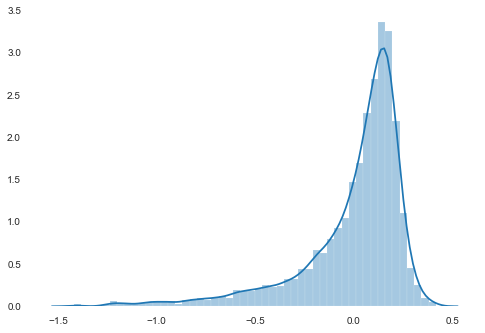

In [51]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

***From the above histogram and Q-Q plot, shows that the residuals are normally distributed, so our  assumption is not violated***